In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv("C:\\Users\\DHRUBAJIT\\Desktop\\AnalyticsVidhya\\Big Mart Sales\\New_dataset.csv")
data.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Content_0,Item_Fat_Content_1,Outlet_Size_0,Outlet_Size_1,Outlet_Size_2,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Type_0,Outlet_Type_1,Outlet_Type_2,Outlet_Type_3,Item_type_new_0,Item_type_new_1,Item_type_new_2
0,9.30,0.126678,15.805354,18,61.115775,1,0,0,1,0,1,0,0,0,1,0,0,0,1,0
1,5.92,0.138846,6.947604,8,21.057607,0,1,0,1,0,0,0,1,0,0,1,0,1,0,0
2,17.50,0.129461,11.900336,18,45.795961,1,0,0,1,0,1,0,0,0,1,0,0,0,1,0
3,19.20,0.000000,13.494258,19,27.062520,0,1,0,1,0,0,0,1,1,0,0,0,0,1,0
4,8.93,0.000000,7.339033,30,31.538947,1,0,1,0,0,0,0,1,0,1,0,0,0,0,1


In [3]:
X = data.drop(['Item_Outlet_Sales'], axis=1)
y = data.Item_Outlet_Sales

In [4]:
XX = X[['Item_Weight','Item_Visibility','Item_MRP','Outlet_Establishment_Year','Item_Fat_Content_0','Outlet_Size_0','Outlet_Type_0','Outlet_Type_1','Outlet_Type_3']]

In [5]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(XX,y, random_state=0, test_size=0.3)

In [6]:
# default model
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
xgboost = XGBRegressor()
xgboost.fit(xtrain,ytrain)
xgboost_pred = xgboost.predict(xtest)
print(xgboost.score(xtrain,ytrain))
print(xgboost.score(xtest,ytest))
print(np.sqrt(mean_squared_error(ytest,xgboost_pred)))

0.703122777313
0.66729737042
10.7876168622


In [7]:
xgboost.feature_importances_

array([ 0.15895954,  0.16329479,  0.44508672,  0.07369942,  0.01445087,
        0.00433526,  0.05780347,  0.033237  ,  0.04913295], dtype=float32)

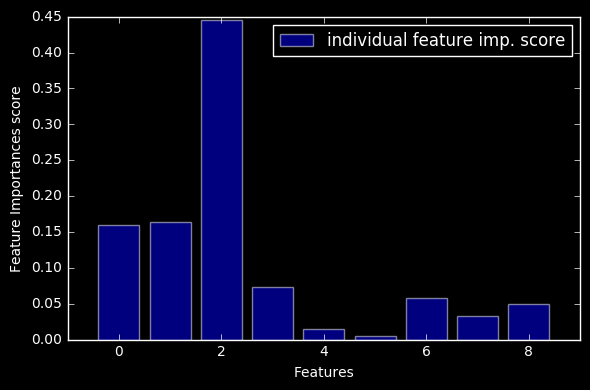

In [10]:
with plt.style.context('dark_background'):
    plt.figure(figsize=(6, 4))
    
    plt.bar(range(9), xgboost.feature_importances_, alpha=0.5, align='center',
            label='individual feature imp. score')
    plt.ylabel('Feature Importances score')
    plt.xlabel('Features')
    plt.legend(loc='best')
    plt.tight_layout()

In [11]:
param_test1 = {
 'max_depth':range(1,50,2),
 'min_child_weight':range(1,6,2)
}
from sklearn.model_selection import GridSearchCV
gsearch1 = GridSearchCV(estimator = XGBRegressor( learning_rate =0.1, n_estimators=140, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 nthread=4, scale_pos_weight=1, seed=27), 
 param_grid = param_test1,n_jobs=4,iid=False, cv=5)
gsearch1.fit(xtrain,ytrain)
gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_

C:\Users\DHRUBAJIT\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: 0.65896, std: 0.01751, params: {'min_child_weight': 1, 'max_depth': 1},
  mean: 0.65896, std: 0.01751, params: {'min_child_weight': 3, 'max_depth': 1},
  mean: 0.65914, std: 0.01743, params: {'min_child_weight': 5, 'max_depth': 1},
  mean: 0.67176, std: 0.01487, params: {'min_child_weight': 1, 'max_depth': 3},
  mean: 0.67208, std: 0.01409, params: {'min_child_weight': 3, 'max_depth': 3},
  mean: 0.67222, std: 0.01459, params: {'min_child_weight': 5, 'max_depth': 3},
  mean: 0.66021, std: 0.01390, params: {'min_child_weight': 1, 'max_depth': 5},
  mean: 0.65929, std: 0.01170, params: {'min_child_weight': 3, 'max_depth': 5},
  mean: 0.65875, std: 0.01255, params: {'min_child_weight': 5, 'max_depth': 5},
  mean: 0.63886, std: 0.01335, params: {'min_child_weight': 1, 'max_depth': 7},
  mean: 0.64058, std: 0.01376, params: {'min_child_weight': 3, 'max_depth': 7},
  mean: 0.64097, std: 0.01439, params: {'min_child_weight': 5, 'max_depth': 7},
  mean: 0.62519, std: 0.01565, params: {

In [12]:
param_test2 = {
 'max_depth':[1,2,3,4,5],
 'min_child_weight':range(1,15,1)
}
from sklearn.model_selection import GridSearchCV
gsearch2 = GridSearchCV(estimator = XGBRegressor( learning_rate =0.1, n_estimators=140, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 nthread=4, scale_pos_weight=1, seed=27), 
 param_grid = param_test2,n_jobs=4,iid=False, cv=5)
gsearch2.fit(xtrain,ytrain)
gsearch2.grid_scores_, gsearch2.best_params_, gsearch2.best_score_

C:\Users\DHRUBAJIT\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: 0.65896, std: 0.01751, params: {'min_child_weight': 1, 'max_depth': 1},
  mean: 0.65896, std: 0.01751, params: {'min_child_weight': 2, 'max_depth': 1},
  mean: 0.65896, std: 0.01751, params: {'min_child_weight': 3, 'max_depth': 1},
  mean: 0.65913, std: 0.01743, params: {'min_child_weight': 4, 'max_depth': 1},
  mean: 0.65914, std: 0.01743, params: {'min_child_weight': 5, 'max_depth': 1},
  mean: 0.65911, std: 0.01739, params: {'min_child_weight': 6, 'max_depth': 1},
  mean: 0.65911, std: 0.01739, params: {'min_child_weight': 7, 'max_depth': 1},
  mean: 0.65917, std: 0.01738, params: {'min_child_weight': 8, 'max_depth': 1},
  mean: 0.65917, std: 0.01738, params: {'min_child_weight': 9, 'max_depth': 1},
  mean: 0.65917, std: 0.01738, params: {'min_child_weight': 10, 'max_depth': 1},
  mean: 0.65917, std: 0.01738, params: {'min_child_weight': 11, 'max_depth': 1},
  mean: 0.65917, std: 0.01738, params: {'min_child_weight': 12, 'max_depth': 1},
  mean: 0.65921, std: 0.01741, params

In [13]:
param_test2b = {
 'min_child_weight':range(8,20,1)
}
gsearch2b = GridSearchCV(estimator = XGBRegressor( learning_rate=0.1, n_estimators=140, max_depth=2,
 min_child_weight=2, gamma=0, subsample=0.8, colsample_bytree=0.8,
 nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test2b,n_jobs=4,iid=False, cv=5)
gsearch2b.fit(xtrain,ytrain)
gsearch2b.grid_scores_, gsearch2b.best_params_, gsearch2b.best_score_

C:\Users\DHRUBAJIT\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: 0.67434, std: 0.01460, params: {'min_child_weight': 8},
  mean: 0.67441, std: 0.01425, params: {'min_child_weight': 9},
  mean: 0.67411, std: 0.01458, params: {'min_child_weight': 10},
  mean: 0.67439, std: 0.01468, params: {'min_child_weight': 11},
  mean: 0.67421, std: 0.01418, params: {'min_child_weight': 12},
  mean: 0.67489, std: 0.01455, params: {'min_child_weight': 13},
  mean: 0.67510, std: 0.01447, params: {'min_child_weight': 14},
  mean: 0.67460, std: 0.01488, params: {'min_child_weight': 15},
  mean: 0.67489, std: 0.01490, params: {'min_child_weight': 16},
  mean: 0.67460, std: 0.01461, params: {'min_child_weight': 17},
  mean: 0.67475, std: 0.01475, params: {'min_child_weight': 18},
  mean: 0.67488, std: 0.01509, params: {'min_child_weight': 19}],
 {'min_child_weight': 14},
 0.6751016299352014)

In [14]:
param_test3 = {
 'gamma':[i/10.0 for i in range(0,10)]
}
gsearch3 = GridSearchCV(estimator = XGBRegressor( learning_rate =0.1, n_estimators=140, max_depth=2,
 min_child_weight=14, subsample=0.8, colsample_bytree=0.8,
 nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test3,n_jobs=4,iid=False, cv=5)
gsearch3.fit(xtrain,ytrain)
gsearch3.grid_scores_, gsearch3.best_params_, gsearch3.best_score_

C:\Users\DHRUBAJIT\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: 0.67510, std: 0.01447, params: {'gamma': 0.0},
  mean: 0.67510, std: 0.01447, params: {'gamma': 0.1},
  mean: 0.67510, std: 0.01447, params: {'gamma': 0.2},
  mean: 0.67510, std: 0.01447, params: {'gamma': 0.3},
  mean: 0.67510, std: 0.01447, params: {'gamma': 0.4},
  mean: 0.67510, std: 0.01447, params: {'gamma': 0.5},
  mean: 0.67510, std: 0.01447, params: {'gamma': 0.6},
  mean: 0.67510, std: 0.01447, params: {'gamma': 0.7},
  mean: 0.67510, std: 0.01447, params: {'gamma': 0.8},
  mean: 0.67510, std: 0.01447, params: {'gamma': 0.9}],
 {'gamma': 0.0},
 0.6751016299352014)

In [15]:
param_test4 = {
 'n_estimators' : range(0,1100,50)
}
gsearch4 = GridSearchCV(estimator = XGBRegressor( learning_rate =0.1,max_depth=2,
 min_child_weight=14, gamma=0.0, subsample=0.8, colsample_bytree=0.8,
 nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test4,n_jobs=4,iid=False, cv=5)
gsearch4.fit(xtrain,ytrain)
gsearch4.grid_scores_, gsearch4.best_params_, gsearch4.best_score_

C:\Users\DHRUBAJIT\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: -5.41571, std: 0.13789, params: {'n_estimators': 0},
  mean: 0.67371, std: 0.01417, params: {'n_estimators': 50},
  mean: 0.67592, std: 0.01456, params: {'n_estimators': 100},
  mean: 0.67463, std: 0.01453, params: {'n_estimators': 150},
  mean: 0.67289, std: 0.01502, params: {'n_estimators': 200},
  mean: 0.67208, std: 0.01515, params: {'n_estimators': 250},
  mean: 0.67037, std: 0.01531, params: {'n_estimators': 300},
  mean: 0.66851, std: 0.01519, params: {'n_estimators': 350},
  mean: 0.66757, std: 0.01528, params: {'n_estimators': 400},
  mean: 0.66685, std: 0.01479, params: {'n_estimators': 450},
  mean: 0.66554, std: 0.01485, params: {'n_estimators': 500},
  mean: 0.66432, std: 0.01513, params: {'n_estimators': 550},
  mean: 0.66296, std: 0.01511, params: {'n_estimators': 600},
  mean: 0.66194, std: 0.01453, params: {'n_estimators': 650},
  mean: 0.66118, std: 0.01448, params: {'n_estimators': 700},
  mean: 0.66015, std: 0.01473, params: {'n_estimators': 750},
  mean: 0.

In [17]:
param_test5 = {
 'subsample':[i/10.0 for i in range(4,10)],
 'colsample_bytree':[i/10.0 for i in range(4,10)]
}
gsearch5 = GridSearchCV(estimator = XGBRegressor( learning_rate =0.1, n_estimators=100, max_depth=2,
 min_child_weight=14, gamma=0.0, subsample=0.8, colsample_bytree=0.8,
 nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test5,n_jobs=4,iid=False, cv=5)
gsearch5.fit(xtrain,ytrain)
gsearch5.grid_scores_, gsearch5.best_params_, gsearch5.best_score_

C:\Users\DHRUBAJIT\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: 0.67077, std: 0.01548, params: {'subsample': 0.4, 'colsample_bytree': 0.4},
  mean: 0.67025, std: 0.01419, params: {'subsample': 0.5, 'colsample_bytree': 0.4},
  mean: 0.67064, std: 0.01466, params: {'subsample': 0.6, 'colsample_bytree': 0.4},
  mean: 0.67075, std: 0.01477, params: {'subsample': 0.7, 'colsample_bytree': 0.4},
  mean: 0.67114, std: 0.01495, params: {'subsample': 0.8, 'colsample_bytree': 0.4},
  mean: 0.67067, std: 0.01493, params: {'subsample': 0.9, 'colsample_bytree': 0.4},
  mean: 0.67434, std: 0.01582, params: {'subsample': 0.4, 'colsample_bytree': 0.5},
  mean: 0.67368, std: 0.01501, params: {'subsample': 0.5, 'colsample_bytree': 0.5},
  mean: 0.67414, std: 0.01522, params: {'subsample': 0.6, 'colsample_bytree': 0.5},
  mean: 0.67435, std: 0.01420, params: {'subsample': 0.7, 'colsample_bytree': 0.5},
  mean: 0.67412, std: 0.01477, params: {'subsample': 0.8, 'colsample_bytree': 0.5},
  mean: 0.67462, std: 0.01489, params: {'subsample': 0.9, 'colsample_bytree'

In [19]:
param_test6 = {
 'subsample':[i/100.0 for i in range(75,95,5)],
 'colsample_bytree':[i/100.0 for i in range(75,95,5)]
}
gsearch6 = GridSearchCV(estimator = XGBRegressor( learning_rate =0.1, n_estimators=100, max_depth=2,
 min_child_weight=14, gamma=0.0, subsample=0.8, colsample_bytree=0.8,
 nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test6, n_jobs=4,iid=False, cv=5)
gsearch6.fit(xtrain,ytrain)
gsearch6.grid_scores_, gsearch6.best_params_, gsearch6.best_score_

C:\Users\DHRUBAJIT\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: 0.67545, std: 0.01365, params: {'subsample': 0.75, 'colsample_bytree': 0.75},
  mean: 0.67553, std: 0.01385, params: {'subsample': 0.8, 'colsample_bytree': 0.75},
  mean: 0.67568, std: 0.01406, params: {'subsample': 0.85, 'colsample_bytree': 0.75},
  mean: 0.67528, std: 0.01435, params: {'subsample': 0.9, 'colsample_bytree': 0.75},
  mean: 0.67533, std: 0.01455, params: {'subsample': 0.75, 'colsample_bytree': 0.8},
  mean: 0.67592, std: 0.01456, params: {'subsample': 0.8, 'colsample_bytree': 0.8},
  mean: 0.67541, std: 0.01420, params: {'subsample': 0.85, 'colsample_bytree': 0.8},
  mean: 0.67522, std: 0.01455, params: {'subsample': 0.9, 'colsample_bytree': 0.8},
  mean: 0.67533, std: 0.01455, params: {'subsample': 0.75, 'colsample_bytree': 0.85},
  mean: 0.67592, std: 0.01456, params: {'subsample': 0.8, 'colsample_bytree': 0.85},
  mean: 0.67541, std: 0.01420, params: {'subsample': 0.85, 'colsample_bytree': 0.85},
  mean: 0.67522, std: 0.01455, params: {'subsample': 0.9, 'cols

In [20]:
param_test7 = {
 'reg_alpha':[1e-5, 1e-2, 0.1, 1, 100]
}
gsearch7 = GridSearchCV(estimator = XGBRegressor( learning_rate =0.1, n_estimators=100, max_depth=2,
 min_child_weight=14, gamma=0.0, subsample=0.8, colsample_bytree=0.8,
 nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test7, n_jobs=4,iid=False, cv=5)
gsearch7.fit(xtrain,ytrain)
gsearch7.grid_scores_, gsearch7.best_params_, gsearch7.best_score_

C:\Users\DHRUBAJIT\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: 0.67592, std: 0.01456, params: {'reg_alpha': 1e-05},
  mean: 0.67592, std: 0.01456, params: {'reg_alpha': 0.01},
  mean: 0.67592, std: 0.01456, params: {'reg_alpha': 0.1},
  mean: 0.67570, std: 0.01472, params: {'reg_alpha': 1},
  mean: 0.67551, std: 0.01473, params: {'reg_alpha': 100}],
 {'reg_alpha': 0.1},
 0.67591883731754021)

In [21]:
param_test8 = {
 'reg_alpha':[0, 0.001, 0.005, 0.01, 0.05,0.1]
}
gsearch8 = GridSearchCV(estimator = XGBRegressor( learning_rate =0.1, n_estimators=100, max_depth=2,
 min_child_weight=14, gamma=0.0, subsample=0.8, colsample_bytree=0.9,
 nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test8,n_jobs=4,iid=False, cv=5)
gsearch8.fit(xtrain,ytrain)
gsearch8.grid_scores_, gsearch8.best_params_, gsearch8.best_score_

C:\Users\DHRUBAJIT\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: 0.67560, std: 0.01481, params: {'reg_alpha': 0},
  mean: 0.67560, std: 0.01481, params: {'reg_alpha': 0.001},
  mean: 0.67560, std: 0.01481, params: {'reg_alpha': 0.005},
  mean: 0.67560, std: 0.01481, params: {'reg_alpha': 0.01},
  mean: 0.67560, std: 0.01481, params: {'reg_alpha': 0.05},
  mean: 0.67560, std: 0.01481, params: {'reg_alpha': 0.1}],
 {'reg_alpha': 0.1},
 0.67560062963010936)

In [131]:
xgb3 = XGBRegressor(
 learning_rate =0.1,
 n_estimators=100,
 max_depth=2,
 min_child_weight=17,
 gamma=0.0,
 subsample=0.8,
 colsample_bytree=0.9,
 reg_alpha=100,
 nthread=4,
 scale_pos_weight=1,
 seed=27)
xgb3.fit(xtrain,ytrain)
xgb3_pred = xgb3.predict(xtest)
print(xgb3.score(xtrain,ytrain))
print(xgb3.score(xtest,ytest))
print(np.sqrt(mean_squared_error(ytest,xgb3_pred)))

0.689173632319
0.67061297433
10.7337293664


In [ ]:
'''
xgb3 = XGBRegressor(
 learning_rate =0.1,
 n_estimators=105,
 max_depth=2,
 min_child_weight=19,
 gamma=0.0,
 subsample=0.75,
 colsample_bytree=0.98,
 reg_alpha=95,
 nthread=4,
 scale_pos_weight=1,
 seed=27)
xgb3.fit(xtrain,ytrain)
xgb3_pred = xgb3.predict(xtest)
print(xgb3.score(xtrain,ytrain))
print(xgb3.score(xtest,ytest))
print(np.sqrt(mean_squared_error(ytest,xgb3_pred)))

0.689157140563
0.67102367623
10.7270355112
'''

In [99]:
xgb4 = XGBRegressor(
 learning_rate =0.01,
 n_estimators=1000,
 max_depth=3,
 min_child_weight=13,
 gamma=0.6,
 subsample=0.8,
 colsample_bytree=0.8,
 reg_alpha=0.01,
 nthread=4,
 scale_pos_weight=1,
 seed=27)
xgb4.fit(xtrain,ytrain)
xgb4_pred = xgb4.predict(xtest)
print(xgb4.score(xtrain,ytrain))
print(xgb4.score(xtest,ytest))
print(np.sqrt(mean_squared_error(ytest,xgb4_pred)))

0.700458817749
0.666416071643
10.8018951172


In [41]:
sales_test = pd.read_csv("C:\\Users\\DHRUBAJIT\\Desktop\\AnalyticsVidhya\\Big Mart Sales\\Big_Mart_Sales_test.csv")

for i in sales_test.Item_Type.unique():
    group1 = sales_test[sales_test['Item_Type'] == i]
    ave = group1['Item_Weight'].mean()
    group1['Item_Weight'] = group1['Item_Weight'].fillna(ave)
   
    sales_test.loc[sales_test['Item_Weight'].isnull(),'Item_Weight'] = group1['Item_Weight']
    
    
outlet_size_mode = sales_test['Outlet_Size'].mode()[0]
sales_test['Outlet_Size'] = sales_test['Outlet_Size'].fillna(outlet_size_mode)

sales_test['Item_Visibility'] = np.sqrt(sales_test['Item_Visibility'])

sales_test['Item_MRP'] = np.sqrt(sales_test['Item_MRP'])


sales_test = sales_test.replace({'Item_Fat_Content' : { 'low fat' : 'Low Fat', 'LF' : 'Low Fat', 'reg' : 'Regular' }})


sales_test['Item_Identifier'].value_counts()
sales_test['Item_type_new'] = sales_test['Item_Identifier'].apply(lambda x: x[0:2])
sales_test['Item_type_new'] = sales_test['Item_type_new'].map({'FD': 'Food', 'NC':'Non-consumable','DR':'Drinks'})
sales_test['Item_type_new'].value_counts()

sales_test['Outlet_Establishment_Year'] = 2017 - sales_test['Outlet_Establishment_Year']

sales_test = sales_test.replace({'Item_Fat_Content' : { 'low fat' : 'Low Fat', 'LF' : 'Low Fat', 'reg' : 'Regular' }})

from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
var_i = ['Item_Fat_Content','Outlet_Size','Outlet_Location_Type','Outlet_Type','Item_type_new']
for i in var_i:
    sales_test[i] = label.fit_transform(sales_test[i])
    
sales_test = pd.get_dummies(sales_test, columns=['Item_Fat_Content','Outlet_Size','Outlet_Location_Type','Outlet_Type','Item_type_new'])

sales_test.head()

C:\Users\DHRUBAJIT\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Fat_Content_0,Item_Fat_Content_1,Outlet_Size_0,...,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Type_0,Outlet_Type_1,Outlet_Type_2,Outlet_Type_3,Item_type_new_0,Item_type_new_1,Item_type_new_2
0,FDW58,20.75000,0.086976,Snack Foods,10.385673,OUT049,18,1,0,0,...,1,0,0,0,1,0,0,0,1,0
1,FDW14,8.30000,0.196030,Dairy,9.344506,OUT017,10,0,1,0,...,0,1,0,0,1,0,0,0,1,0
2,NCN55,14.60000,0.315555,Others,15.548434,OUT010,19,1,0,0,...,0,0,1,1,0,0,0,0,0,1
3,FDQ58,7.31500,0.124050,Snack Foods,12.451265,OUT017,10,1,0,0,...,0,1,0,0,1,0,0,0,1,0
4,FDY38,12.95504,0.344383,Dairy,15.304574,OUT027,32,0,1,0,...,0,0,1,0,0,0,1,0,1,0


In [42]:
Submission_ids = sales_test[['Item_Identifier','Outlet_Identifier']]


test_set = sales_test.drop(['Item_Identifier','Outlet_Identifier'], axis=1)
test_set.head()

,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Item_Fat_Content_0,Item_Fat_Content_1,Outlet_Size_0,Outlet_Size_1,Outlet_Size_2,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Type_0,Outlet_Type_1,Outlet_Type_2,Outlet_Type_3,Item_type_new_0,Item_type_new_1,Item_type_new_2
0,20.75000,0.086976,Snack Foods,10.385673,18,1,0,0,1,0,1,0,0,0,1,0,0,0,1,0
1,8.30000,0.196030,Dairy,9.344506,10,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0
2,14.60000,0.315555,Others,15.548434,19,1,0,0,1,0,0,0,1,1,0,0,0,0,0,1
3,7.31500,0.124050,Snack Foods,12.451265,10,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0
4,12.95504,0.344383,Dairy,15.304574,32,0,1,0,1,0,0,0,1,0,0,0,1,0,1,0


In [43]:
test_set = test_set.drop(['Item_Type'], axis=1)

In [46]:
test_set = test_set[['Item_Weight','Item_Visibility','Item_MRP','Outlet_Establishment_Year','Item_Fat_Content_0','Outlet_Size_0','Outlet_Type_0','Outlet_Type_1','Outlet_Type_3']]

In [47]:
Submission_ids.head()

,Item_Identifier,Outlet_Identifier
0,FDW58,OUT049
1,FDW14,OUT017
2,NCN55,OUT010
3,FDQ58,OUT017
4,FDY38,OUT027


In [132]:
prediction = xgb3.predict(test_set)
prediction

array([ 39.09128952,  36.54697418,  24.114048  , ...,  42.31335831,
        59.9099884 ,  35.17843246], dtype=float32)

In [133]:
prediction = np.square(prediction)
prediction

array([ 1528.12890625,  1335.68127441,   581.48730469, ...,  1790.42028809,
        3589.20678711,  1237.52209473], dtype=float32)

In [134]:
id1 = Submission_ids['Item_Identifier']
id2 = Submission_ids['Outlet_Identifier']

In [135]:
df = pd.DataFrame({'Item_Identifier':id1,'Outlet_Identifier':id2, 'Item_Outlet_Sales':prediction})

In [136]:
df1 = df[['Item_Identifier','Outlet_Identifier','Item_Outlet_Sales']]
df1.head()

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1528.128906
1,FDW14,OUT017,1335.681274
2,NCN55,OUT010,581.487305
3,FDQ58,OUT017,2313.862061
4,FDY38,OUT027,5254.934570


In [137]:
submission_csv = df1.to_csv('final_submission36.csv', index=False)